#                                       Machine Learning Project

## Dataset Description: 

*Machine learning has made its foray into food and beverages as well and it is being applied to assess the quality of produce using different parameters. In this problem, the goal is to model the quality of red wine based on its physical properties. This dataset consists of attributes related to the red wine variant of the Portuguese "Vinho Verde" wine.* <br>

***Dataset for red wine - winequality.csv***

#### *GOAL : The aim is to predict the wine quality using regression modelling.*

**Attributes:**<br>
Input variables (based on physicochemical tests):<br> 1 - fixed acidity <br>2 - volatile acidity<br> 3 - citric acid <br>4 - residual sugar<br> 5 - chlorides<br> 6 - free sulfur dioxide <br>7 - total sulfur dioxide<br> 8 - density<br> 9 - pH <br>10 - sulphates <br>11 - alcohol content Output variable (based on sensory data)<br> 12 – quality of wine (score between 0 and 10)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score
%matplotlib inline

In [2]:
original_df = pd.read_csv("winequality-red.csv",sep = ";")

In [3]:
df = original_df.copy( deep= True )

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
print(df.shape)
print(df.size)

(1599, 12)
19188


In [6]:
df.info()   #this tells we donot have all continous variable only "quality is discrete variable"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.isnull().sum()       #Great!!! we dont have any missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

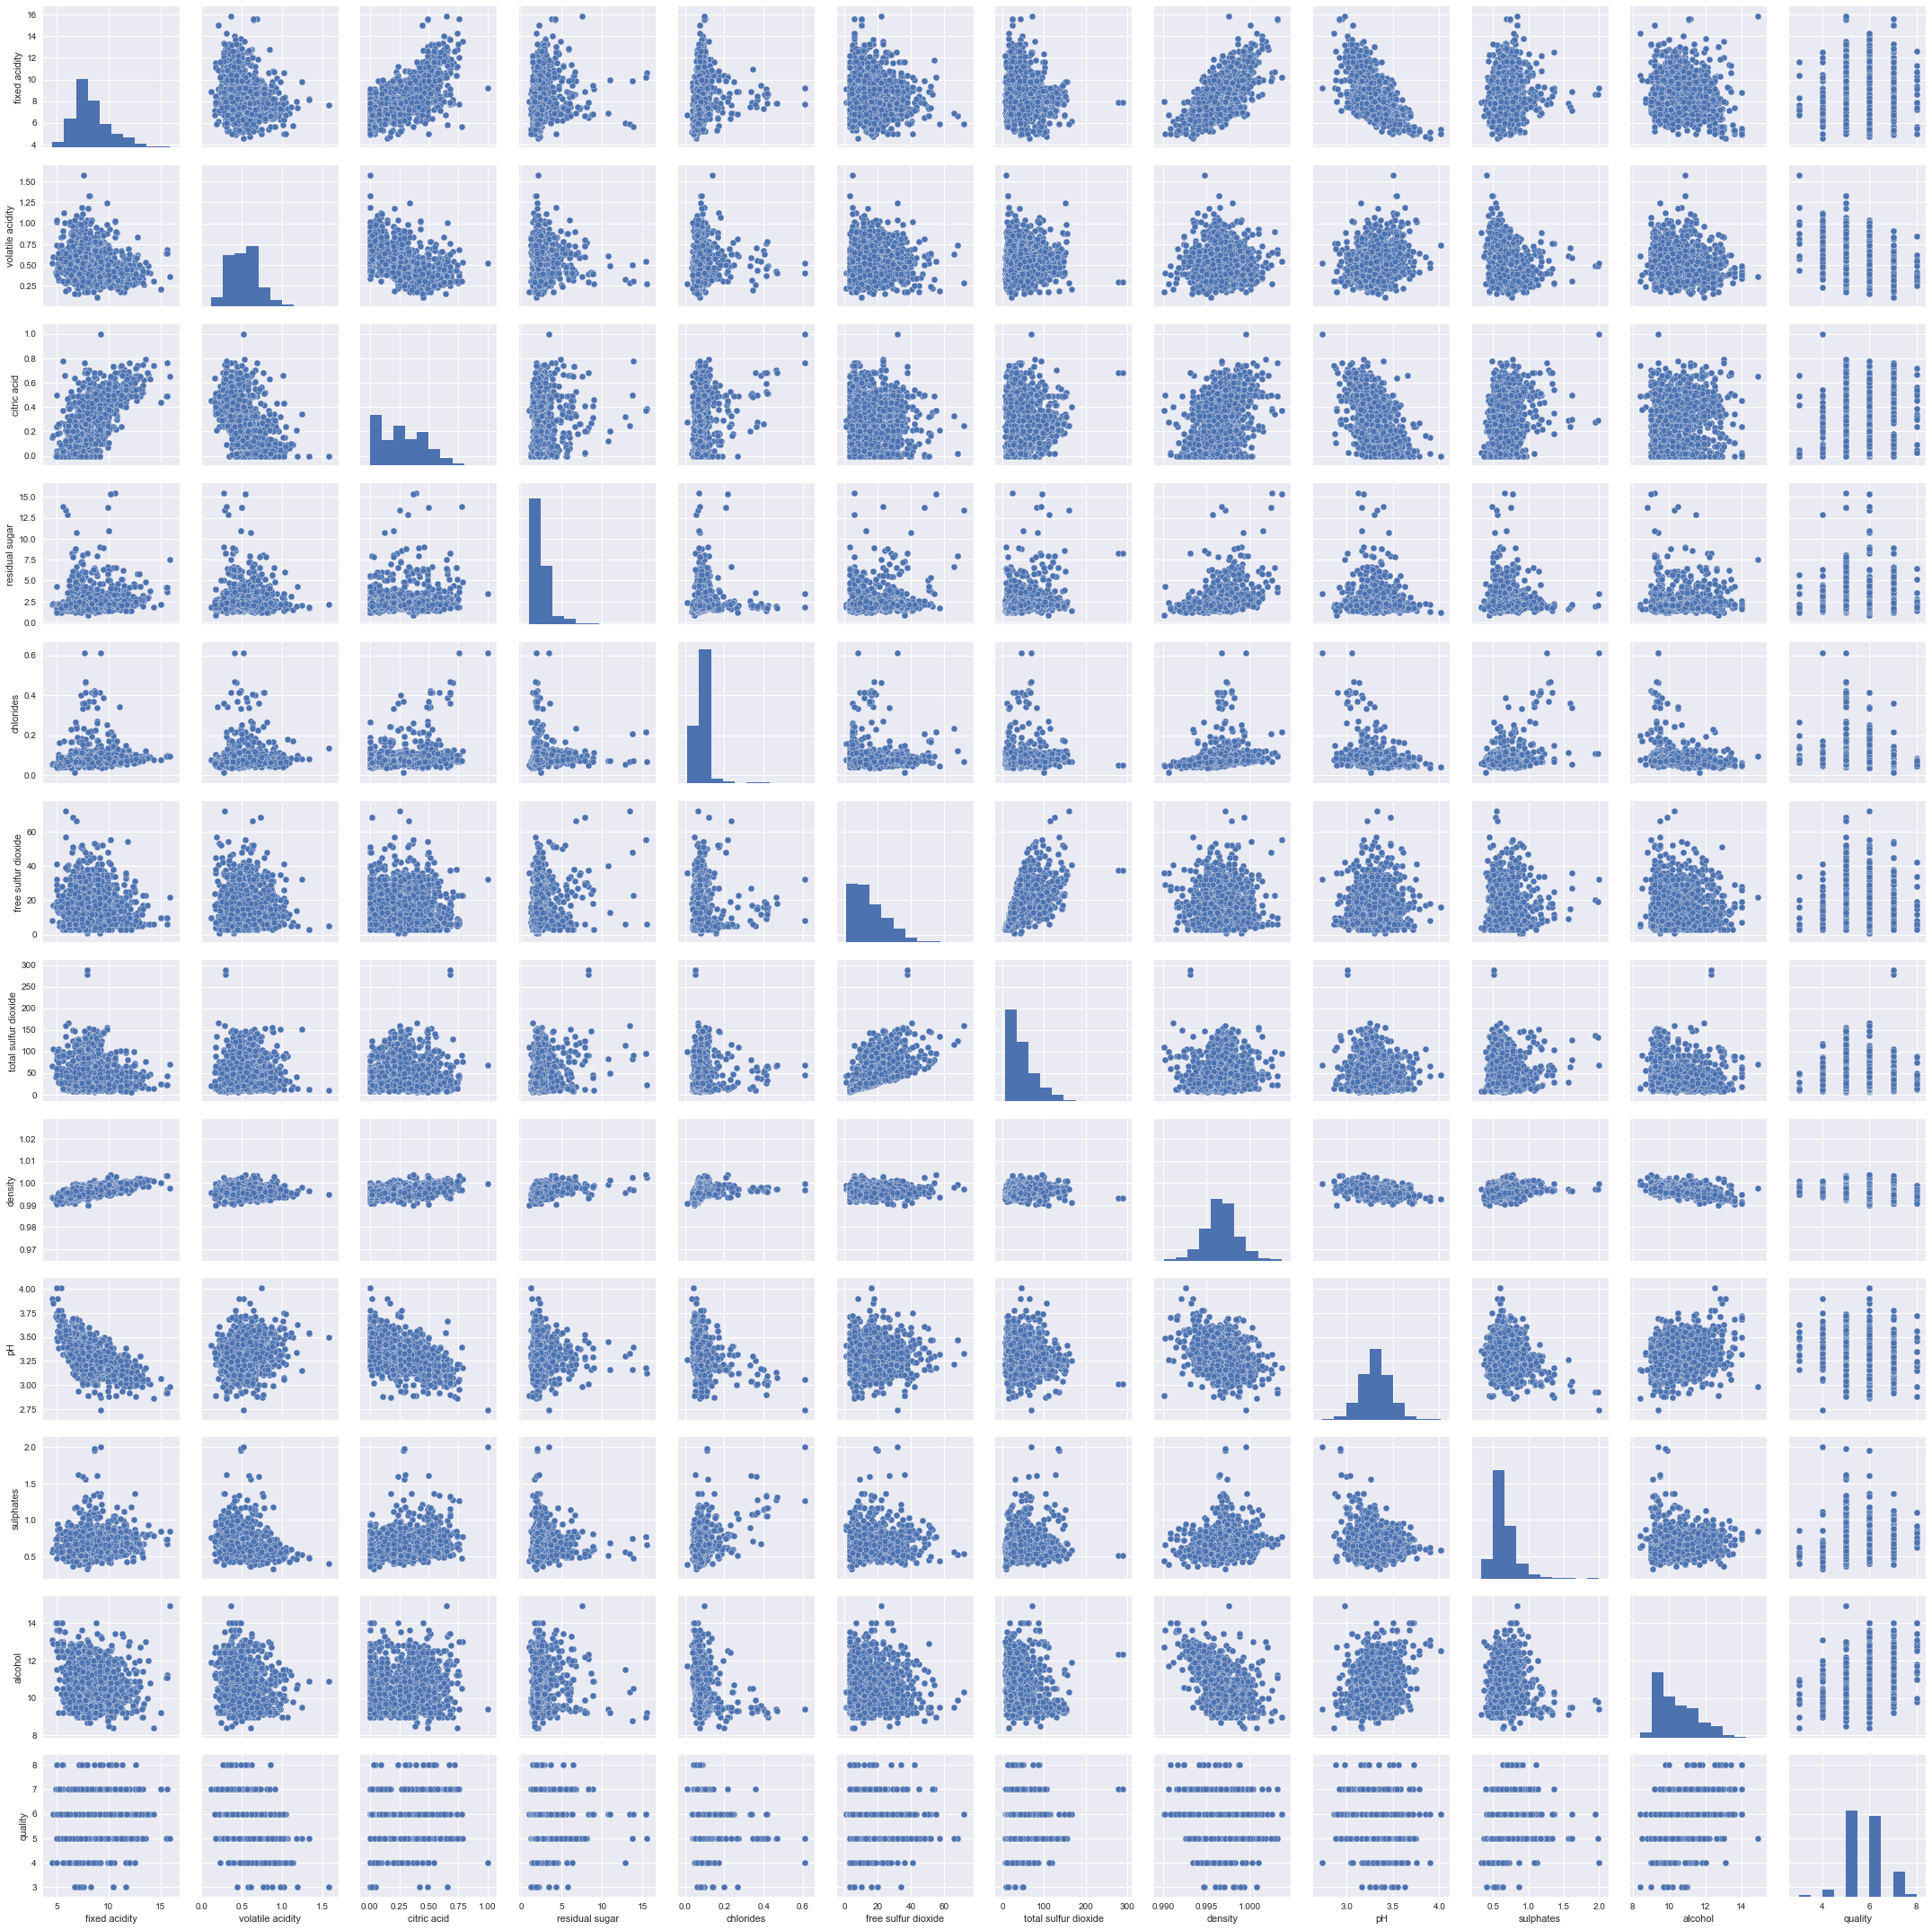

In [8]:
sns.pairplot(df)   # it shows that most of the varibales donot show any relationship but few does have lets check

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


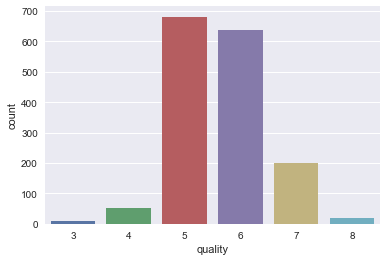

In [9]:
# given that target variable is wine quality , here we see that the mostly wine quality is 5 - 6 
sns.countplot(df["quality"])
print(df["quality"].value_counts())

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# univariate analysis:

1. We see that there is not much variance in each feature as mean and median are close to each other
2. we dont have any null values... which is great, which is very less in real world scenario.
3. we can assume that dataset is uniformly distributed but still we need confimation, so we will plot histogram and see if its true
4. Standard deviation is less zero or close to 1 in most cases except sulphur dioxide so we can assume that ist use in wine does vary than other components

**see the distribution of each variable and find out the if we get any useful info**

In [10]:
col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
col[1]

'volatile acidity'

In [11]:
# we will create a function to get statical info and histogram  for each feature
# since the scope of project is limited to Regression modeling and our variable are also continous  
#our DA tools will be dependant on the above parameter.

def univariate_analysis(col2):
    return(print(df[col2].describe()))
    
       

In [12]:

def hist_distribution(col3):
    plt.subplots(1,1)
    #plt.hist()
    sns.distplot(df[col3])
    plt.title(col3)
    plt.show()

univariate analysis of  fixed acidity
count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64
------------------------------------------------------------


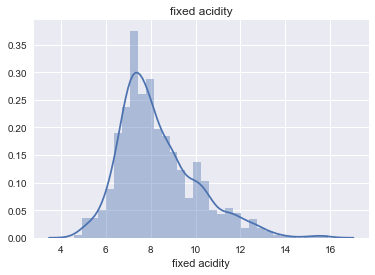

univariate analysis of  volatile acidity
count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64
------------------------------------------------------------


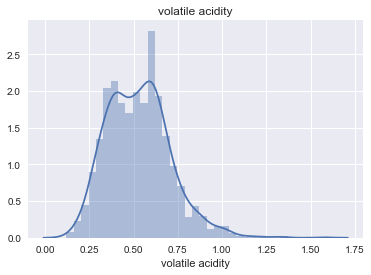

univariate analysis of  citric acid
count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64
------------------------------------------------------------


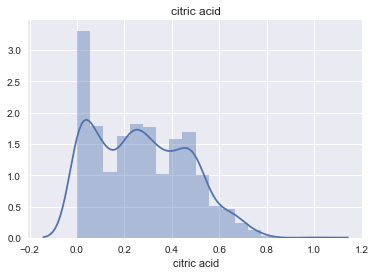

univariate analysis of  residual sugar
count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64
------------------------------------------------------------


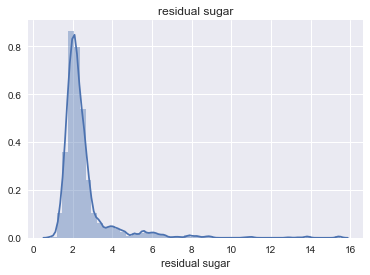

univariate analysis of  chlorides
count    1599.000000
mean        0.087467
std         0.047065
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64
------------------------------------------------------------


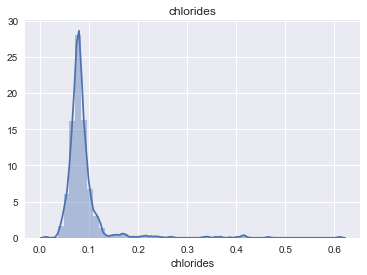

univariate analysis of  free sulfur dioxide
count    1599.000000
mean       15.874922
std        10.460157
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        72.000000
Name: free sulfur dioxide, dtype: float64
------------------------------------------------------------


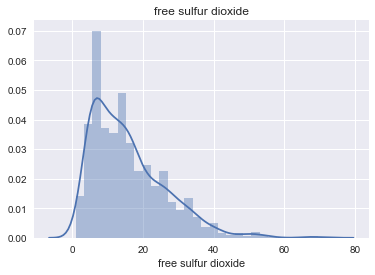

univariate analysis of  total sulfur dioxide
count    1599.000000
mean       46.467792
std        32.895324
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64
------------------------------------------------------------


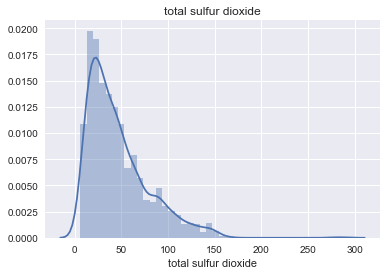

univariate analysis of  density
count    1599.000000
mean        0.996747
std         0.001887
min         0.990070
25%         0.995600
50%         0.996750
75%         0.997835
max         1.003690
Name: density, dtype: float64
------------------------------------------------------------


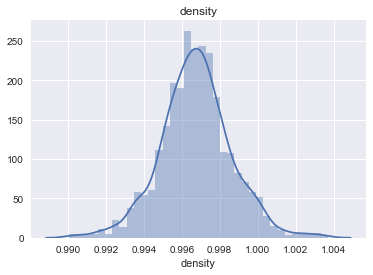

univariate analysis of  pH
count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64
------------------------------------------------------------


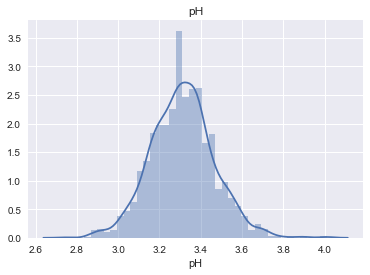

univariate analysis of  sulphates
count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64
------------------------------------------------------------


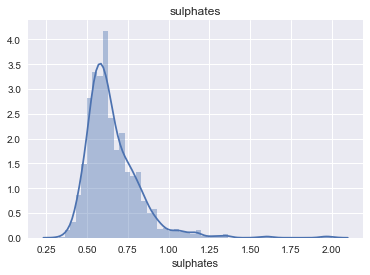

univariate analysis of  alcohol
count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64
------------------------------------------------------------


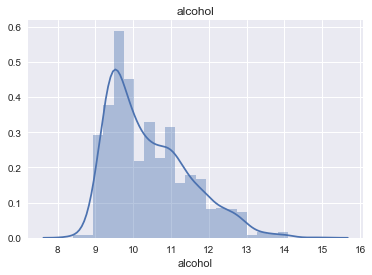

univariate analysis of  quality
count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64
------------------------------------------------------------


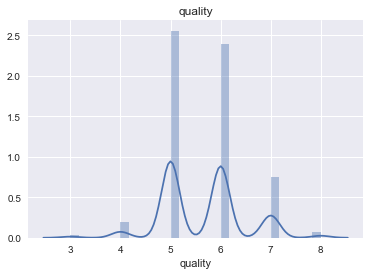

In [13]:
for i in col:
    print("univariate analysis of ",i)
    univariate_analysis(i)
    print("-"*60)
    hist_distribution(i)
    
#we see most variable has long tails

** We see that only few feature are uniformaly distributed that is forming bell curve, whereas other have either long tail, non uniform distribution , or bimodal distribution so we need to fix this properly so that we do not loose any insight and feed our machine learning algorithm with good data**

In [14]:
print(col)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


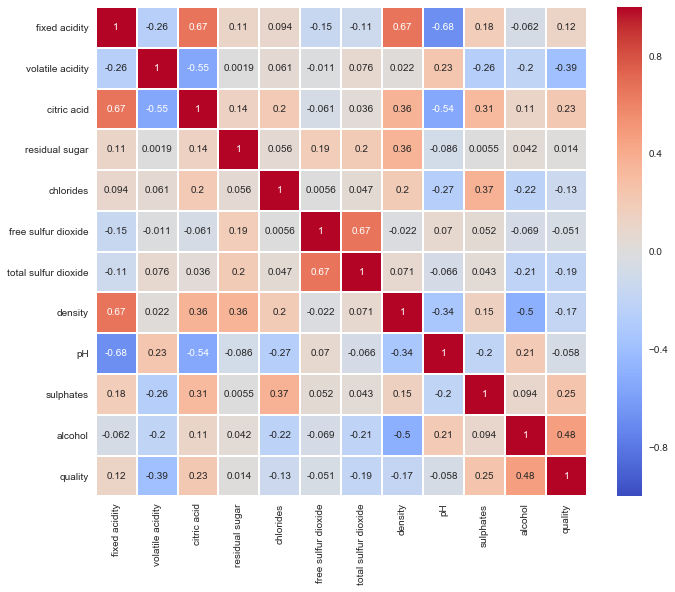

In [15]:
plt.figure(figsize=(11,9))
sns.heatmap(df.corr(), cmap = "coolwarm" ,linewidths=1, annot= True)   #we see very less collinearity in the dataset

# Bivariate analysis:

** comapring all 11 features with target variable so that we can see what features impact the target variable and atlast use them in model prediction.** <br>

** we will plot boxplot and scatter plot to see the distribution . for that we are decrsibing a function bivariate_plots() for the same.**

In [16]:
def bivariate_plots(target,feature):
    plt.figure(figsize=(17,9))
    plt.subplot(2,2,1)
    sns.boxplot(x=target,y=feature,data=df)
    plt.subplot(2,2,4)
    cor = df.corrwith(df[feature]).plot.bar(color = "teal")
    plt.title("correlation of "+feature+" with other features")
    plt.subplot(2,2,3)
    sns.violinplot(x=target,y=feature,data=df)
    plt.subplot(2,2,2)
    sns.regplot(x=target,y=feature,data=df,logx= True)
    plt.title(feature)
    plt.show()


### 1. "quality"vs"fixed Acidity"  : what is fixed acidity

Acids are major wine constituents and contribute greatly to its taste.In fact, acids impart the sourness or tartness that is a fundamental feature in wine taste.  Wines lacking in acid are "flat." Traditionally total acidity(also known as titratable acidity) is sum of two groups, namely the volatile acids(which evaporates easily)  and the nonvolatile or fixed acids. ** so mixing of various acids(tartaric, malic, citric, and succinic) for enhancing the taste levels of wine can be reffered as fixed acidity.** <br> lets plot a graph to see the variation.<br> 

ref_link: http://hannamaroc.com/fr/acidity-in-wines/ <br> http://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity

boxplot and correlation plot of fixed acidity with other features.

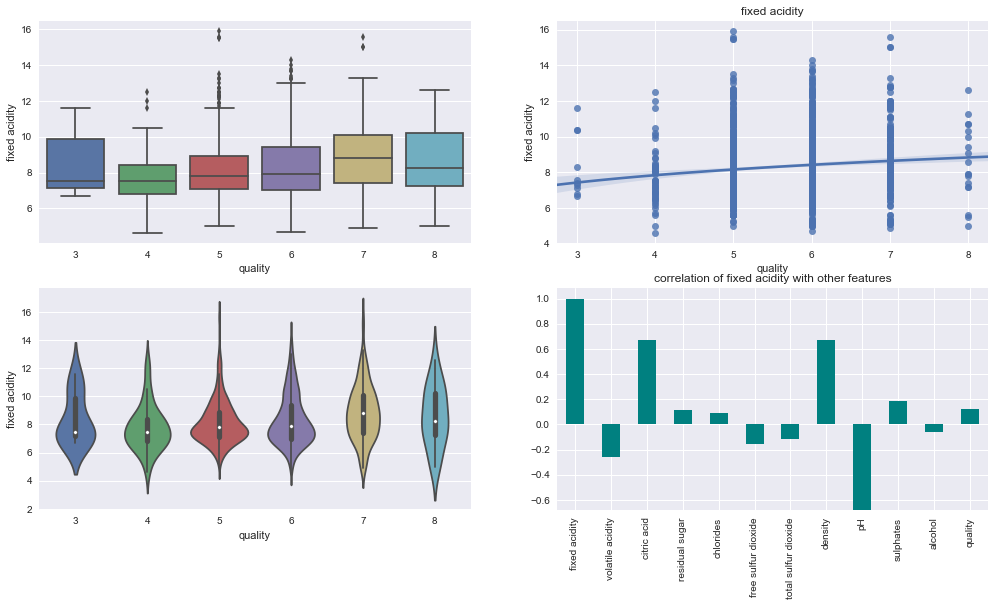

In [17]:
bivariate_plots("quality","fixed acidity")

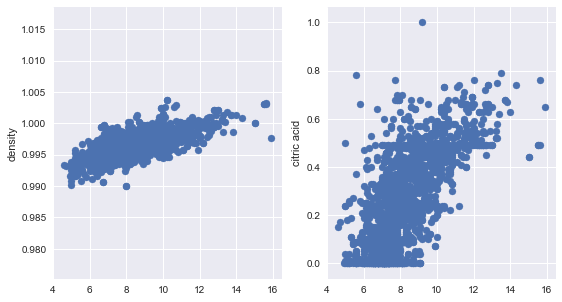

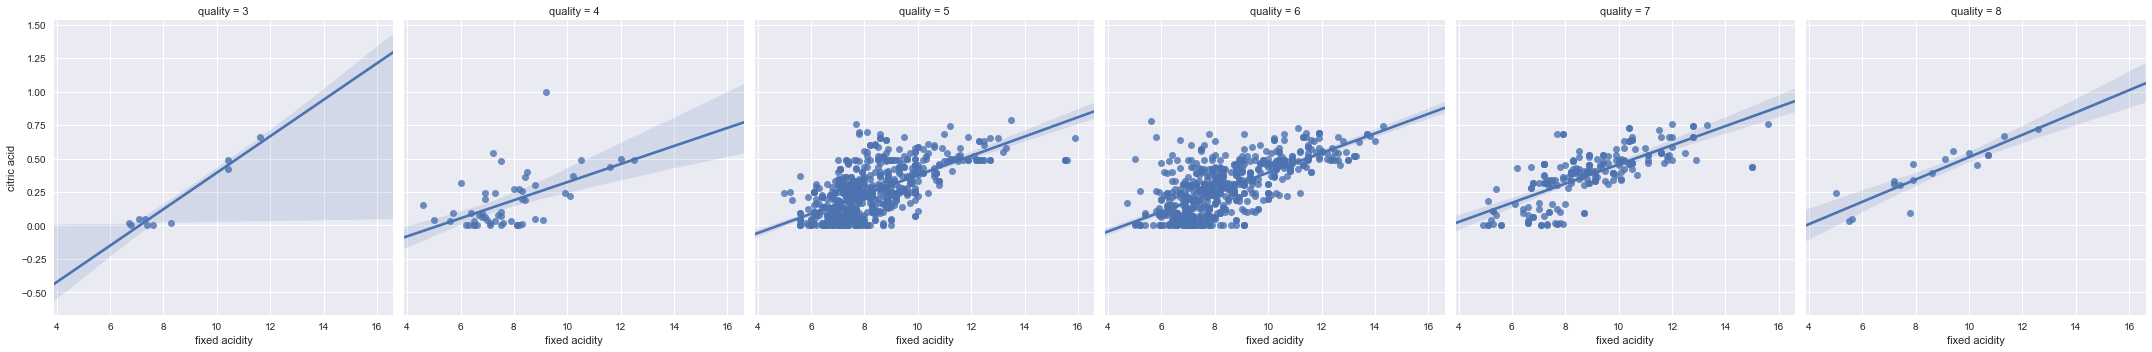

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

In [18]:
plt.figure(figsize=(9,5))
plt.subplot(121)
plt.scatter(x = 'fixed acidity',y = 'density',data = df)
plt.ylabel("density")
plt.subplot(122)
plt.scatter(x = 'fixed acidity',y = 'citric acid',data = df)
plt.ylabel("citric acid")
sns.lmplot(x = 'fixed acidity',y = 'citric acid',col ='quality' ,data = df)
plt.show()
df['fixed acidity'].describe()   #this variable have right skew need log treatment

##### conclusion : 
1.**fixed acidity is corelated with "PH","density","citric acid"** <br>
2.an negetive correlation with PH is Obviuos** as the acidity of wine increases the PH level drops as low ph indicated more acidic**,<br>
3.A positive corellation with Citirc acid is also obvious because fixed acid contains citric acid as a component for wine making<br>
4.acid density and fixed acidity have overlapping and a blunt linear growth,but we can atleast say that density increases with the increase of fixed acids <br>
5.there are outliers we will see then in our Outlier treatment section <br>
6.Violin plot, regplot shows us how the observtion for 3,4,5,6,7 hover around median but with long tails(distribution uneven,or outliers but also the spread is also increasing), and for quality 8 the distribution is normal with wider speard(more variablity) this tells that** the increase usage of fixed acids (gram/lt) leading to a good quality wine.**


### quality vs 'volatile acidity' : what is volatile acidity.

Volatile acidity refers to amount of volatile acid(acetic acid) present in the wine. It is that component which can be considered as a reason of wine fault because it might give a vinegar-like taste to acid. It should be preferable low . 

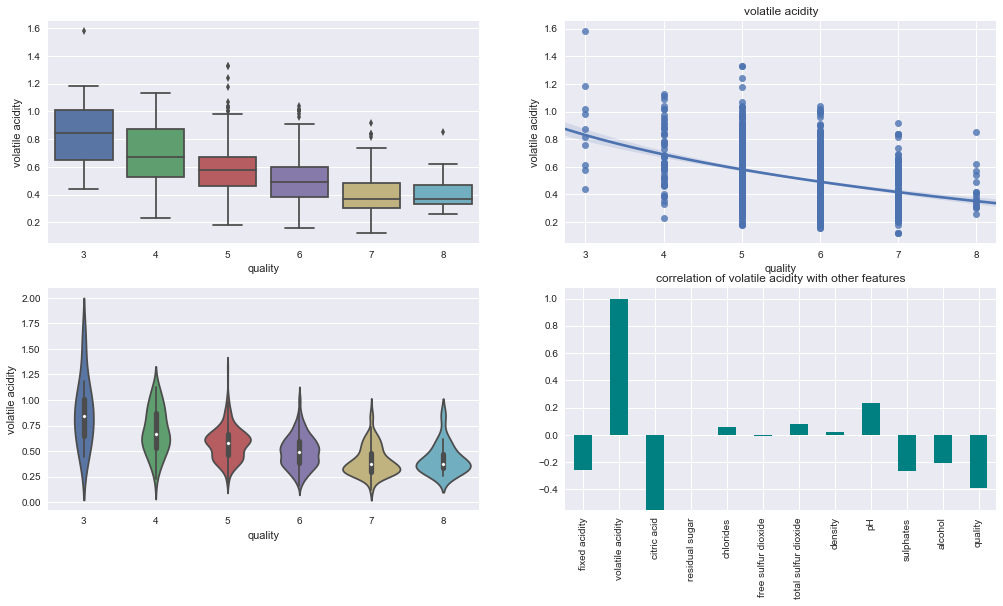

In [19]:
bivariate_plots("quality",'volatile acidity')   #this variable is not normall distributed hence need to to be normalize/scaled

#### conclusion: 
1.so here we see that as the quality increases the means of the different quality decrases ** which means that the wine of higher quality has less volatile acidity and bad quality wine has more volatile acidity** <br>
2.there are outliers we will see then in our Outlier treatment section.

### quality vs Citric acid:  What is Citric Acid doing in Wine? 

used by winemakers in acidification to boost the wine's total acidity. It is used less frequently than tartaric and malic due to the aggressive citric flavors it can add to the wine. It often has a concentration about 1/20 that of tartaric acid
ref_link: https://en.wikipedia.org/wiki/Acids_in_wine

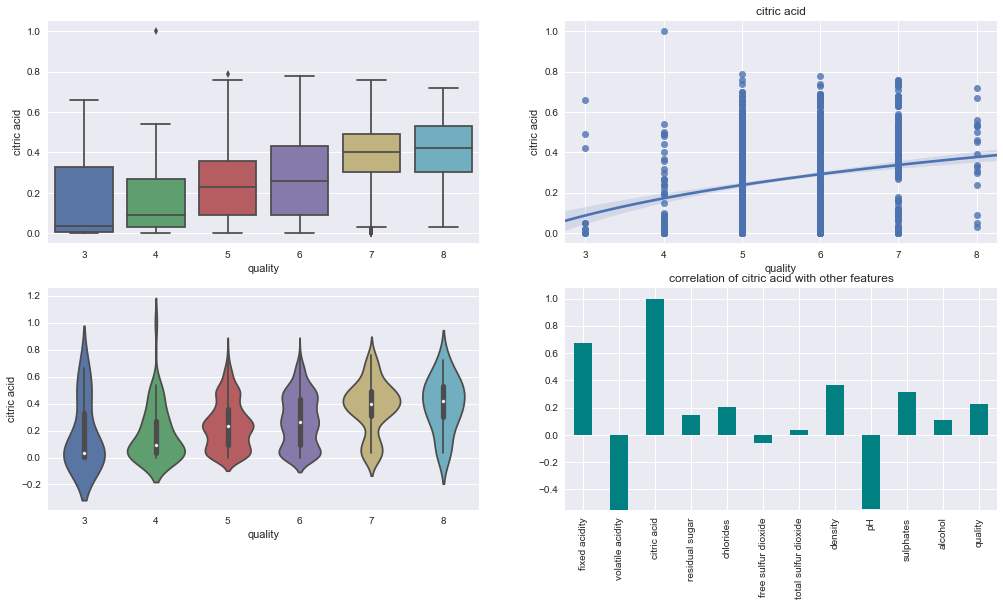

In [20]:
bivariate_plots('quality','citric acid')

quality
3    0.035
4    0.090
5    0.230
6    0.260
7    0.400
8    0.420
Name: citric acid, dtype: float64


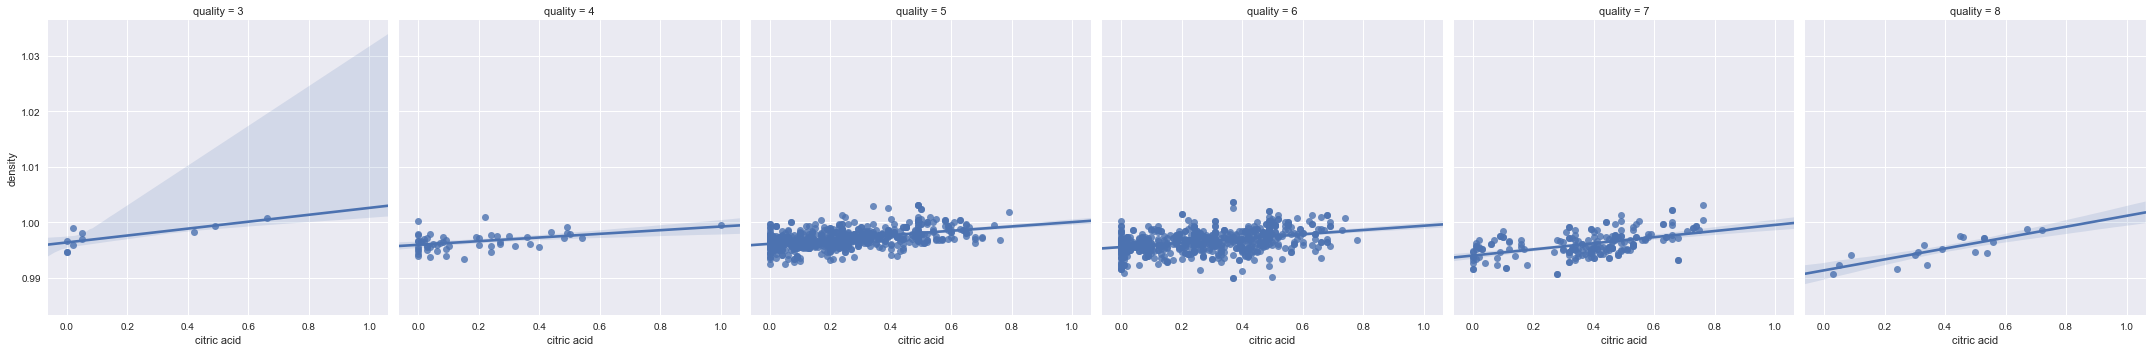

In [21]:
print(df.groupby(by = df['quality'])['citric acid'].median())
plt.figure(figsize=(10,10))
sns.lmplot(x='citric acid',y='density',col = 'quality',data = df)
plt.show()

#### conclusion: 
1.Here we see that the **compostion of Citric acid(median) is increasing with the increase in quality may be because it adds a taste of freshness to the wine**. <br> 2.but we also see that the median for quality 7,8 is same (approx 0.4 gm/ltr) and less skew which also means that the mostly good quality wine citric acid composition might range from 0.3 to 0.42 (gm/ltr).<br>
3.**citric acid also has role to increase density**

### Quality vs residual Sugar: what is residual sugar in wine??<br>
the components influencing how sweet a wine will taste is residual sugar. Residual sugar typically refers to the sugar remaining after fermentation stops,but it can also result from the addition of unfermented must or ordinary table sugar.How sweet a wine will taste is also controlled by factors such as the acidity and alcohol levels, the amount of tannin present, and whether the wine is sparkling or not. reflink: https://en.wikipedia.org/wiki/Sweetness_of_wine#Residual_sugar

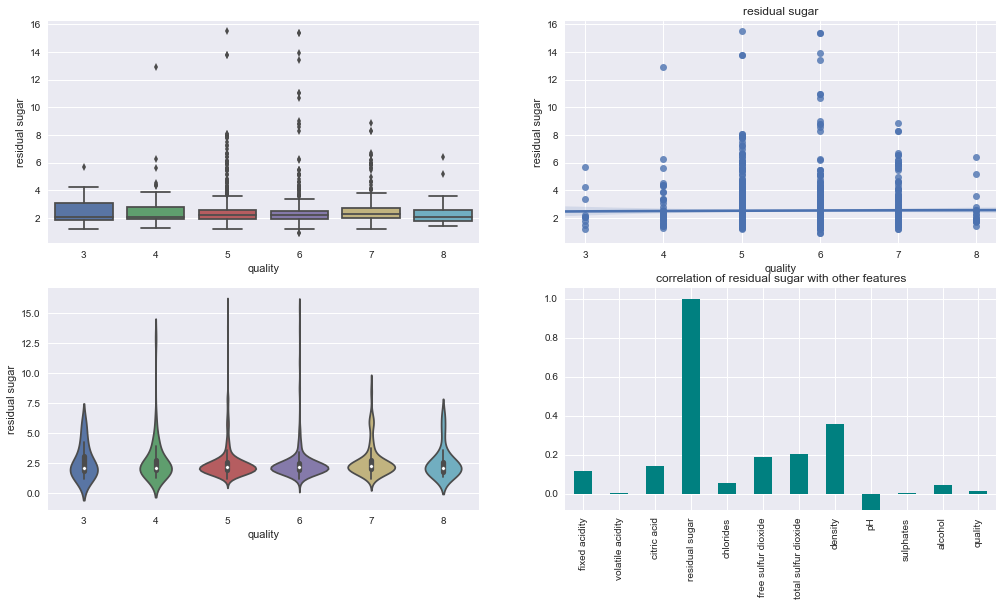

In [22]:
bivariate_plots('quality','residual sugar')

quality
3    2.1
4    2.1
5    2.2
6    2.2
7    2.3
8    2.1
Name: residual sugar, dtype: float64


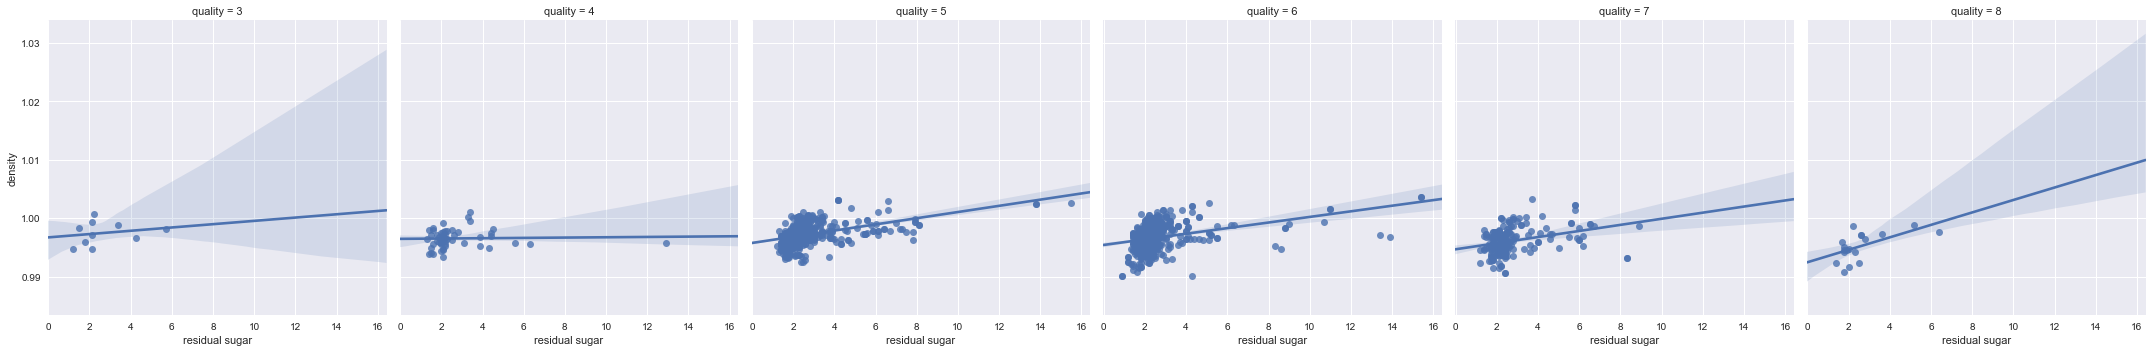

In [23]:
print(df.groupby(by = df['quality'])['residual sugar'].median())
sns.lmplot(x='residual sugar',y='density',col = 'quality',data = df)

####  Conclusion : 
1.we see that residual sugar has very less correlaton with quality,and we see residual composition(median) is somewhat same for all quality of wine,means that **different quality of wine have same sugar levels and but it is also in controlled for the quality**<br>
2.talking about outliers : they can be genuine as there are variety of wines(for which no information given in dataset) present which can have a different sugar composition ,and our analysis is only on quality of wines and not on types, but instaed of removing it we will tame these values for our model.<br>
3.From above histogram of Residual sugar we see that there is a long right tail(right skew) so before feeding this feature in ML algoritim we will do a "log transformation" of this variable<br>
4.**the increase in residual sugar of wine increases the density of the wine**.

### quality vs chlorides: whats chloride doing in wine???
wine flavor is strongly impacted by this particular ion, which, in high concentration, gives the wine an undesirable salty taste and significantly decreases its market appeal.<br>
ref_link: http://www.scielo.br/scielo.php?script=sci_arttext&pid=S0101-20612015000100095

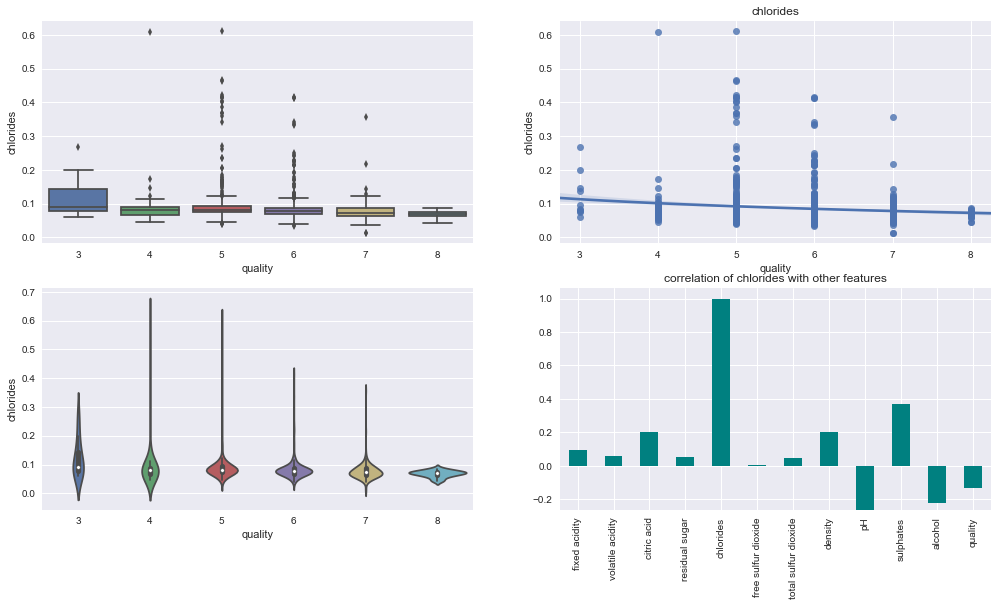

In [24]:
bivariate_plots('quality','chlorides')

         chlorides    pH   density
quality                           
3           0.0905  3.39  0.997565
4           0.0800  3.37  0.996500
5           0.0810  3.30  0.997000
6           0.0780  3.32  0.996560
7           0.0730  3.28  0.995770
8           0.0705  3.23  0.994940


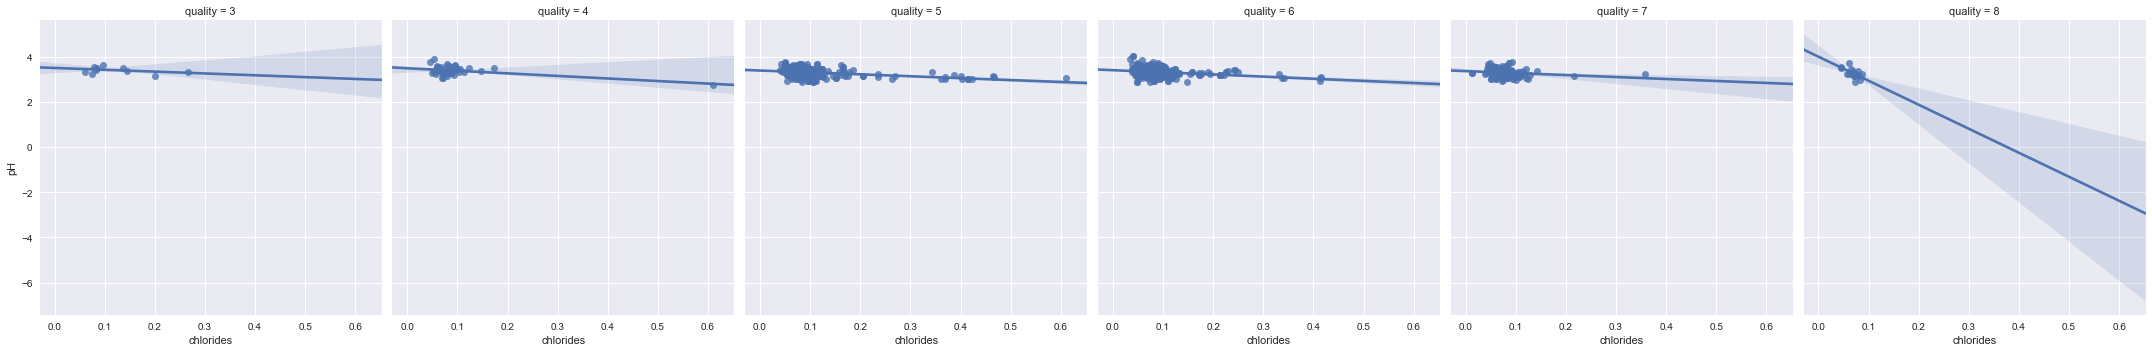

In [25]:
print(df.groupby(by = df['quality'])['chlorides','pH','density'].median())
sns.lmplot(x='chlorides',y = 'pH',col = 'quality',data = df)

#### Conclusions:
1.we see the negetive correlation of chlorides with quality which is obvious because if the salt is more in wine it wont taste good.so** less salt composition in wine give good quality wine**.<br>
2.since chlorides have neutral pH which can distort the balance of acid and base of the wine so it should be always used in the controlled amount for maintaining the ph of wine   .<br>
3.and yes , we see a notable postive correlation with sulphates... well we will check this later when we do analysis for sulphates<br>
4.one more thing to notice that there is slight increment in all the acidic component for wine if the chlorides component increses which is why also the pH goes down.

### quality vs free sulfur dioxide: what is free sulfur dioxide?
the free form of sulfur dioxide is used as preservative in wine for preventing microbial growth, discoloration and oxidation process which also helps in improving the quality and appearance of wineif used in proper proportions. It should be used in controlled levels because hihg levls of it can lead to bad taste and aroma also can be dangerous to health. its measure is ppm

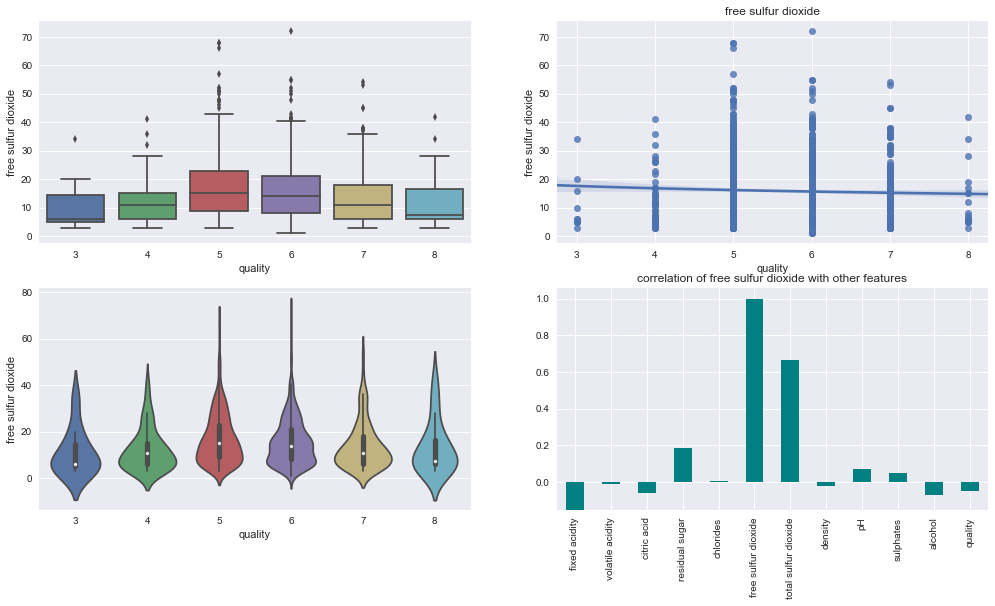

In [26]:
bivariate_plots('quality','free sulfur dioxide')

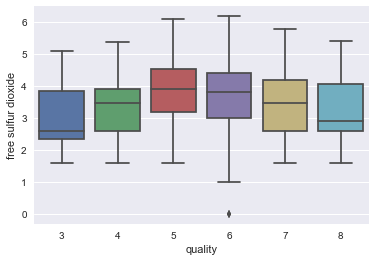

In [27]:
df.groupby(by = df['quality'])['free sulfur dioxide'].describe().T
#plt.subplot(121)
#plt.hist(df["free sulfur dioxide"])
#plt.subplot(122)
sns.boxplot(y = np.log2(df["free sulfur dioxide"]), x= 'quality',data =  df)
plt.show()

#### conclusion:
1.we see that its use was always less for other wine as well but the **good quality wine is using it more moderately**.<br>
2.this data has lot of variance in it, and also it has right skew so we treated this by log tranformation with base 2 as the axis value then look similar.<br>
3.with log base treatment its visible that for mostly(considering 75th percentile) all quality of wine has the ppm count below 50 ppm  <br>
4.it has quite a lot outlier which we will try to either tame or remove them completely as they are completely misleading the analysis.<br>
5.it is obvious to have a **strong correlation with total sulphur dioxide because it is a measure of the presence of sulphur dioxide in the wine**.

### quality vs total sulfur dioxide: what is total sulfur dioxide?
amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

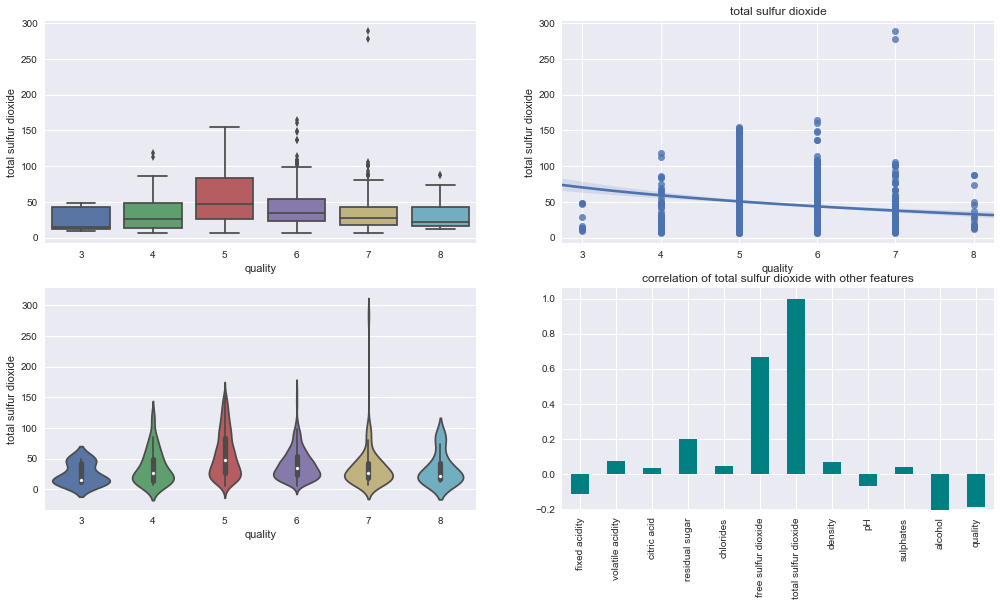

In [28]:
bivariate_plots('quality','total sulfur dioxide')

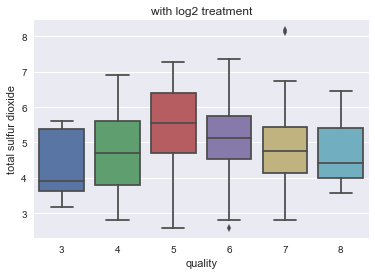

In [29]:
sns.boxplot(y = np.log2(df["total sulfur dioxide"]), x= 'quality',data =  df)
plt.title("with log2 treatment")
plt.show()

#### Conclusion:
1.there is negetive correlation b/w quality and total sulfur dioxide, **increase in the so2 will decrease the quality of wine which is also visible in the regplot**.<br>
2.with log base treated boxplot, it is seen that **there is constant moderation in the usage of so2 as per the quality**.

### quality vs density:

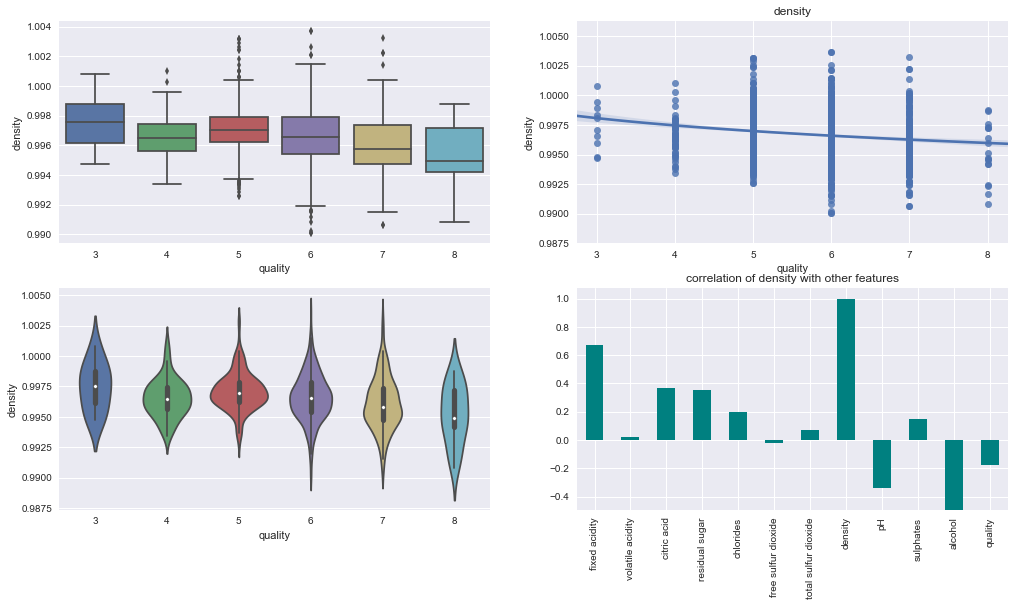

In [30]:
bivariate_plots('quality','density')

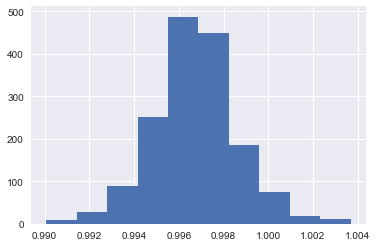

In [31]:
plt.hist(df["density"])
plt.show()

#### conclusion:
1.we see the distribution is normal distribution, the data is distributed noramally.<br>
2.the increase in density leads to decrease in quality of wine.<br>
3.the increase in density leads to decrease in alcohol solubility of wine.<br>
4.we see that wine quality 8 has a spred in it but less denser wine as compared to others<br> 
5.all the acid component of wine increases the density of the wine<br>  

### quality vs ph:
describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

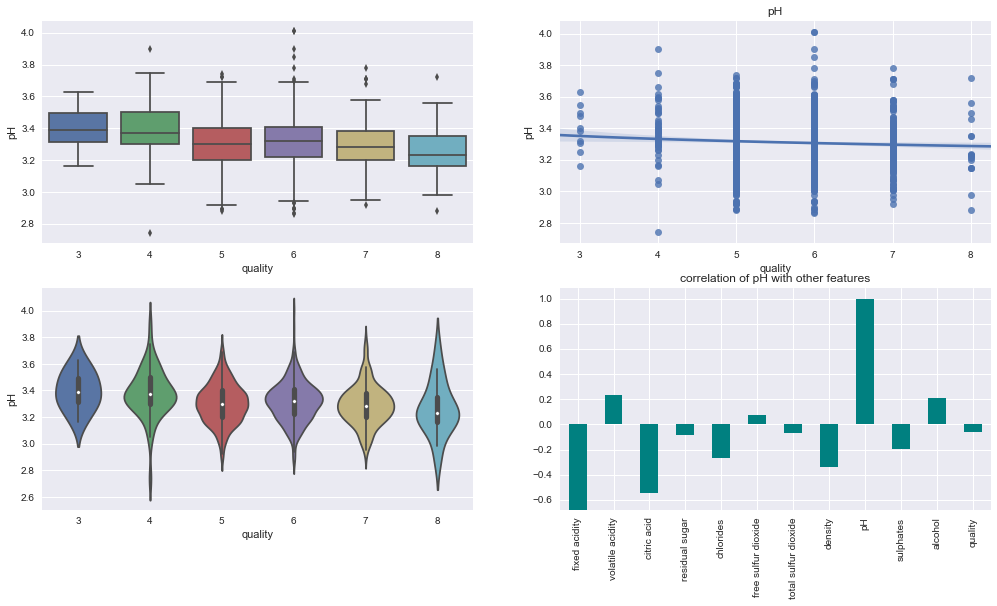

In [32]:
bivariate_plots('quality','pH')

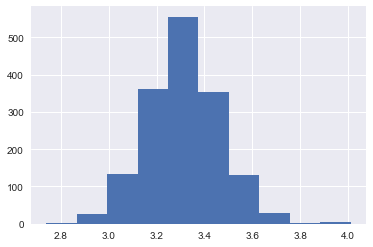

In [33]:
plt.hist(df["pH"])
plt.show()

#### conclusion:
1.the values are centered around the median so less variance.<br>
2.**increase in ph decrease the quality of wine**.<br>
3.mostly the **ph range of wine is from 2.8 to 3.7**.<br>

### quality vs sulphates:
a wine additive which can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant.

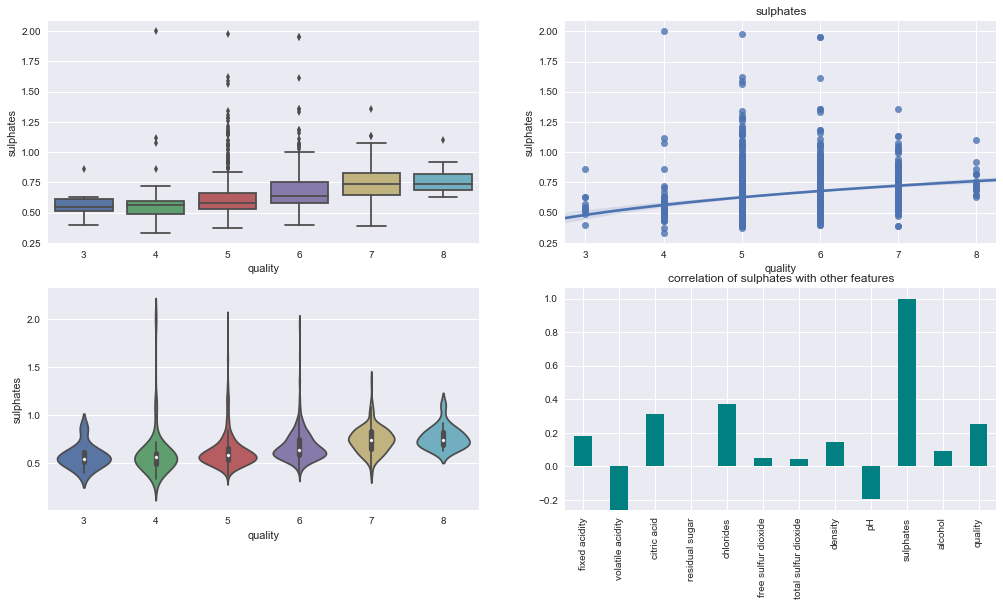

In [34]:
bivariate_plots('quality','sulphates')

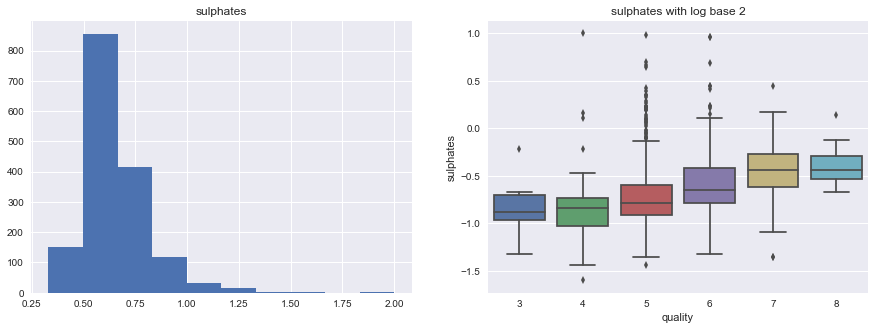

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(df["sulphates"])
plt.title("sulphates")
plt.subplot(122)
sns.boxplot(x = 'quality', y = np.log2(df["sulphates"]),data = df)
plt.title("sulphates with log base 2")
plt.show()

#### conclusion:
1.since the data had skew so we treated it with log base 2 transformation and the boxplot shows that the variance among each group is decreasing when we moves towards good quality wine <br>
2.outliers need to be treated or we can bring down them to our range.<br>
3.**a controlled and moderate usage of sulphates leads to increase in quality of wine**.<br>
4.**increase in sulphates increase in chlorides**

### quality vs alcohol:
the percent alcohol content of the wine

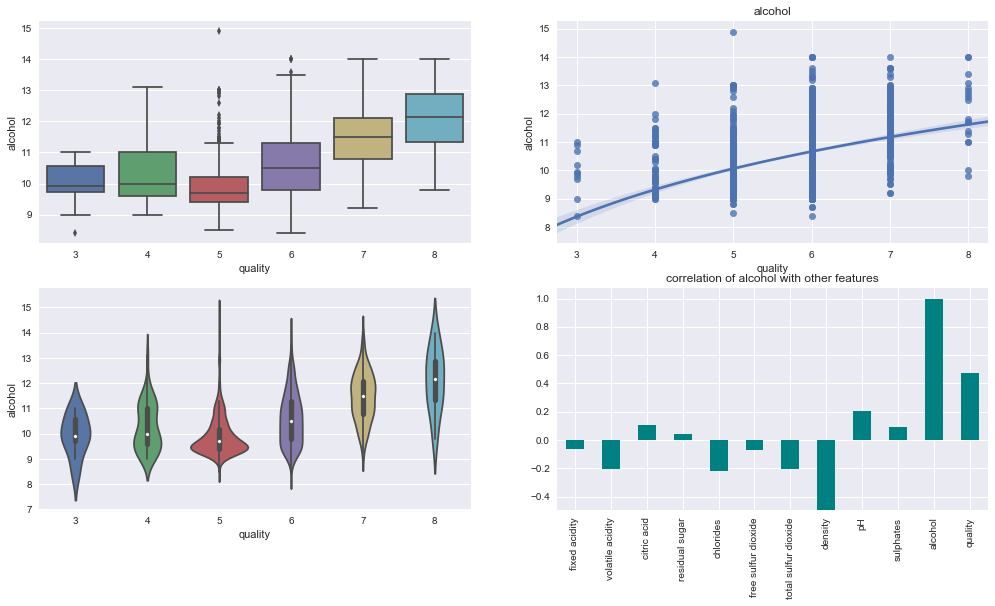

In [36]:
bivariate_plots('quality','alcohol')

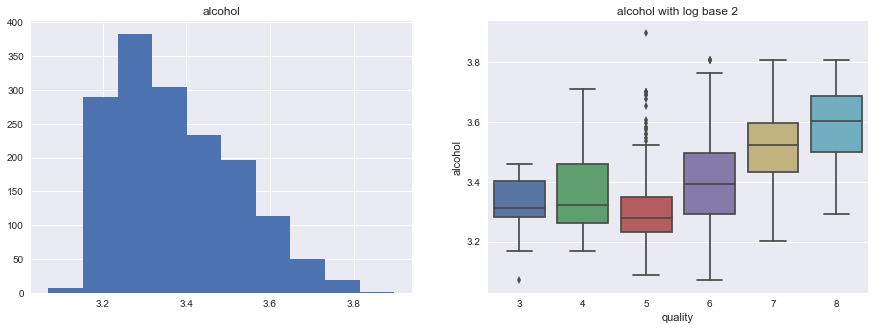

quality
3    0.818009
4    0.934776
5    0.736521
6    1.049639
7    0.961933
8    1.224011
Name: alcohol, dtype: float64


In [37]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(np.log2(df["alcohol"]))
plt.title("alcohol")
plt.subplot(122)
sns.boxplot(x = 'quality', y = np.log2(df["alcohol"]),data = df)
plt.title("alcohol with log base 2")
plt.show()
print(df.groupby(by = df['quality'])['alcohol'].std())

#### conclusion:
1.**the high quality of wine have large percent of alcohol in it. so it is the important component of wine<br>
2.the data is not normaly distributed so we will use log method there is more spread in each group of quality.<br>

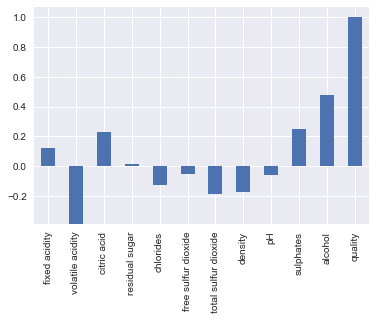

In [38]:
df.corrwith(df["quality"]).plot.bar()

In [39]:
# we see that fixed acid, citric acid,sulphates,alcohol have positve correlation with quality
df2 = df.copy(deep = True)

In [40]:
#seprating of x predictor variable an y target variable before treatment
y = df2['quality']

x = df2[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
     'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

#### Outlier Treatment:
we will try replacing all outlier values with median values as this way they will come in considerable range<br>

In [41]:
# lets first detect the outlier i am using the basic method of using q1-1.5*IQR, Q3+1.5*IQR
def outlier_detect_and_replace(feature):
    print("outliers of {:s} modified within: ".format(feature))
    q1, q3, median  = (np.percentile(df2[feature],25),np.percentile(df2[feature],75),np.percentile(df2[feature],50))
    iqr = q3-q1
    lower_quartile = q1-(1.5*iqr)
    upper_quartile = q3+(1.5*iqr)
    #print("the value below {:4.3f} the value above {:4.3f} are outliers".format(lower_quartile,upper_quartile))
    a = df2[(df2[feature]>upper_quartile) | (df2[feature]<lower_quartile)][feature]
    #print("total outlier in this feature is ",a.count())
    df2[feature].loc[(df[feature]>upper_quartile) | (df2[feature]<lower_quartile)] = np.nan
    df2.fillna(median,inplace = True)
    print(df2[feature].min(),df2[feature].max())

In [45]:
from sklearn import warnings
warnings.filterwarnings(action= 'ignore')

In [46]:
for co in col[:11]:
    outlier_detect_and_replace(co)

outliers of fixed acidity modified within: 
4.6 11.8
outliers of volatile acidity modified within: 
0.12 0.98
outliers of citric acid modified within: 
0.0 0.79
outliers of residual sugar modified within: 
1.2 3.1
outliers of chlorides modified within: 
0.047 0.109
outliers of free sulfur dioxide modified within: 
1.0 42.0
outliers of total sulfur dioxide modified within: 
6.0 112.0
outliers of density modified within: 
0.99252 1.0008
outliers of pH modified within: 
2.93 3.68
outliers of sulphates modified within: 
0.33 0.94
outliers of alcohol modified within: 
8.4 13.2


### Feature engineering:
now that we have done outlier treatment of our dataset , the only data prepration left is feature engineering:<br>

i will be **standardising the dataset** because we have seen that our data has different units in predictor features(x) (like, gm/ltr,percent,ppm and etc..) and as we know it is best to **standardise your data before feeding it to ML algo to avoid any weighted bias**. I have already **imported standardscaler from sklearn.preprocessing package** <br>


In [47]:
ss = StandardScaler()
x_std = ss.fit_transform(x)
x_std.shape

(1599, 11)

In [48]:
x_std_df = pd.DataFrame(data = x_std,columns=col[0:11])
x_std_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [49]:
# now that we have standardised the predictor column we will use "x_std" and y variables in future use

## Creating Training and test data:
we Create train and test data by **spliting the dataset in to two unequal parts** like 60% training data 40% testing data, so that we can train model to find the trends in dataset with training dataset and with test data we compare the results of the model prediction. <br>
i have already imported **Train_test_split method to split the data**, i an splitting data into 8:2 ratio as it is the standard set, and also dataset is small so this much ratio is enough.<br>  

In [50]:
x_std_df_train,x_std_df_test,y_train,y_test = train_test_split(x_std_df,y,test_size = 0.2,random_state = 123)
print(x_std_df_train.shape)
print(x_std_df_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


### Model building and prediction:
here we are on the first step of model building, so here it is very important for us to choose right type of algorithm for the problem we are solving, since here our **Aim is to predict the quality of wine with Regression modeeling technique** <br>
So we will use **these algortihm for prediction:<br> 1. Linear Regression<br> 2. Decision Tree<br> 3. Random Forest** <br>

Only model building is not enough so we also need to evaluate the model we use **Evaluation Metric** for that to chech how well did the model do, we will **use Rmse to check the preformance of our models** we are using rmse also because it will give results in the units of our target variable.

In [51]:
# let us import the RMSE metric:
from sklearn import metrics

In [52]:
#1.Linear Regression:-
lin_reg = LinearRegression()
lin_reg.fit(x_std_df_train,y_train)
pred1 = lin_reg.predict(x_std_df_test)
rmse = np.sqrt(metrics.mean_squared_error(y_true=y_test,y_pred=pred1))
print("Linear regression rmse : ",rmse)

Linear regression rmse :  0.66021721765


In [53]:
#2 Decision Tree :-
dtree =  DecisionTreeRegressor()
dtree.fit(x_std_df_train,y_train)
pred2 = dtree.predict(x_std_df_test)
rmse = np.sqrt(metrics.mean_squared_error(y_true=y_test,y_pred=pred2))
print("Decision tree rmse : ",rmse)

Decision tree rmse :  0.794512429104


In [54]:
#3 Random Forest
rf = RandomForestRegressor()
rf.fit(x_std_df_train,y_train)
pred3 = rf.predict(x_std_df_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test,pred3))
print("Random Forest rmse : ",rmse)

Random Forest rmse :  0.601144741306


### Conclusion:
here we see that Random forest is giving better results as the low rmse score for random forest model but we still haven't set the parameters and it can also be the result in bias, Inorder to get better model we use methods like PCA, Kfold (cv value only), Grid Search so that we can remove the problem of multicollinerity, overfitting respectively. Grid Serach is used for hyperparameter tuning.<br>

1. Firstly, we will be setting hyper parametres according to the algorthim.<br>
1. Secondly, PCA for reducing dimension because may be not all feature contribute good results in the model.<br>
1. Thirdly, Grid Search help us to give best parameters and model prediction results. 

In [55]:
#setting parametrs for algorithm
dtree_param = {'criterion':['mse','mae'], 
               'max_depth':[3,4], 
               'max_leaf_nodes':[4,5,6], 
               'min_samples_leaf':[1,2], 
               'min_samples_split':[2,3]
              }
lin_reg_params = { 'normalize' : [False,True]
                 }

rf_params = {'criterion' : ['mse','mae'], 
             'n_estimators':[50,60,70],
             'max_depth':[7,8],
             'max_leaf_nodes':[3,4],
             'min_samples_leaf':[2,3],
             'min_samples_split':[3,4]
             }
estimator_list = [lin_reg,dtree,rf]

# PCA : Principal Component Analysis  - 

using just to reduce features. we can avoid this if features are very less, here i am using tojust test if it makes any difference in the model score.

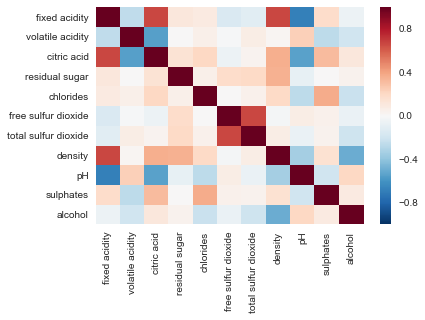

In [56]:
sns.heatmap(x_std_df.corr()) #we see correlation

In [57]:
from sklearn.decomposition import PCA      #importing PCA

In [58]:
pca = PCA().fit(x_std_df)
print(x_std_df.columns)
print(pca.explained_variance_ratio_)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
[ 0.28173931  0.1750827   0.1409585   0.11029387  0.08720837  0.05996439
  0.05307193  0.03845061  0.0313311   0.01648483  0.00541439]


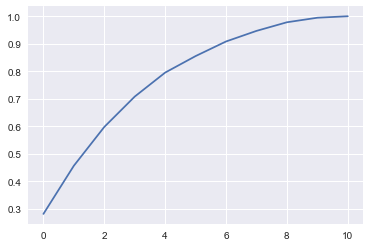

In [68]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

**chose 8 components because after 8th component the expalined variance ratio is somewhat constant and not creating that much differnce**

In [60]:
pca_with_component = PCA(n_components=8)
pca_df = pca_with_component.fit_transform(x_std_df)

In [61]:
pca_df.shape

(1599, 8)

In [62]:
pca_df = pd.DataFrame(data = pca_df)
pca_df.head()

,0,1,2,3,4,5,6,7
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714,-1.009829,0.762587
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473,-0.539553,0.597946
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017,0.344290,-0.455375
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258


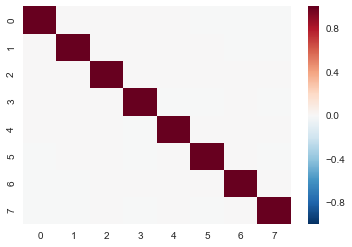

In [69]:
sns.heatmap(pca_df.corr())

In [70]:
#now splitting data according to the newly transformed pca dataframe

In [71]:
pca_xtrain,pca_xtest,y_train,y_test = train_test_split(pca_df,y,test_size = 0.2,random_state = 123)
print(pca_xtrain.shape)
print(pca_xtest.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 8)
(320, 8)
(1279,)
(320,)


In [72]:
#Using Grid Search for predicting the target variable with the best parameters of algorithm
# i tried grid search with different cv values an got similar results(because our dataset is small) but best values 
#came from cv=5.

In [78]:
#GRID SEARCH:
def grid_search_funct(estimator):
    param_list = [lin_reg_params,dtree_param,rf_params]
    for i in range(len(estimator)):
        grid_srch = GridSearchCV(estimator=estimator[i],param_grid=param_list[i],cv = 10)
        grid_srch.fit(pca_xtrain,y_train)
        grd_pred = grid_srch.predict(pca_xtest)
        print("best paramteres: ",grid_srch.best_params_)
        rmse = np.sqrt(metrics.mean_squared_error(y_true=y_test,y_pred=grd_pred))
        print("grid rmse : ",rmse )

In [74]:
grid_search_funct(estimator_list)   #with CV 5

best paramteres:  {'normalize': True}
grid rmse :  0.673938337579
best paramteres:  {'criterion': 'mse', 'max_depth': 3, 'max_leaf_nodes': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
grid rmse :  0.71409440728
best paramteres:  {'criterion': 'mse', 'max_depth': 7, 'max_leaf_nodes': 4, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 70}
grid rmse :  0.712189090499


In [76]:
grid_search_funct(estimator_list) #With cv = 2

best paramteres:  {'normalize': True}
grid rmse :  0.673938337579
best paramteres:  {'criterion': 'mse', 'max_depth': 3, 'max_leaf_nodes': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
grid rmse :  0.71409440728
best paramteres:  {'criterion': 'mse', 'max_depth': 7, 'max_leaf_nodes': 4, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 60}
grid rmse :  0.708245849744


In [79]:
grid_search_funct(estimator_list)# with cv = 10

best paramteres:  {'normalize': False}
grid rmse :  0.673938337579
best paramteres:  {'criterion': 'mse', 'max_depth': 4, 'max_leaf_nodes': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
grid rmse :  0.71409440728
best paramteres:  {'criterion': 'mse', 'max_depth': 7, 'max_leaf_nodes': 4, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 70}
grid rmse :  0.712332808946


In [80]:
## some test n trials
#considering that only 4 features [''alcohol','fixed acidity', 'citric acid','sulphates'] tells about quality of wine
#so lets build model using these 4 feature
x1 = x_std_df[['alcohol','fixed acidity', 'citric acid','sulphates']]
y1 = y
x1.head()

,alcohol,fixed acidity,citric acid,sulphates
0,-0.960246,-0.528360,-1.391472,-0.579207
1,-0.584777,-0.298547,-1.391472,0.128950
2,-0.584777,-0.298547,-1.186070,-0.048089
3,-0.584777,1.654856,1.484154,-0.461180
4,-0.960246,-0.528360,-1.391472,-0.579207


In [81]:
x1tr,x1ts,ytr,yts = train_test_split(x1,y1,test_size = 0.2,random_state = 123)
x1tr.shape

(1279, 4)

In [82]:
lin_reg.fit(x1tr,ytr)
pred4 = lin_reg.predict(x1ts)
rmse = np.sqrt(metrics.mean_squared_error(y_true=yts,y_pred=pred4))
rmse

0.68211891701979899

In [83]:
rf1 = RandomForestRegressor(criterion= 'mse', max_depth= 7, max_leaf_nodes= 4, min_samples_leaf= 2, min_samples_split= 4,n_estimators= 70)
rf1.fit(x1tr,ytr)
pred4 = rf1.predict(x1ts)
rmse = np.sqrt(metrics.mean_squared_error(y_true=yts,y_pred=pred4))
rmse

0.68298736787845682

In [84]:
d1 = DecisionTreeRegressor(criterion= 'mse', max_depth= 3, max_leaf_nodes= 6, min_samples_leaf= 1, min_samples_split= 2)
d1.fit(x1tr,ytr)
pred4 = d1.predict(x1ts)
rmse = np.sqrt(metrics.mean_squared_error(y_true=yts,y_pred=pred4))
rmse

0.70238421359913861

## Final Conclusion:

#### 1. Out of all model we see that Linear Regression performed better in all cases but wee see that even Random Forest has close by scores

#### 2. With PCA and grid search we dont see much decrease in rmse because our dataset is small but these will give better results with large data set 

#### 3. Hence we can conclude that the 4 features ['alcohol','fixed acidity', 'citric acid','sulphates'] leads to a deciding factor in wine Quality as wee that all three algorithm with the best perimeter shows the rmse score which is close to the best performing model.

#### 4. Out of 3 Algorithm Linear Regression and Random Forest gave better results with rmse of 0.67-0.68, better than Decision Tree, so we will use either of Linear Regression or Random Forest as a prediction model. But, due to the mathmatical and logical reason of model we would prefer Random Forest as it may have more options of parameters which it can select from and in future also it may adapt to the variablity in values of the dataset 

#### 5. Lastly there can be other little things we can do to improve model and i think this is what usually data scientist do as their daily task.As tuning and predicting the result are back n forth activity until we reach to a best results .